<a href="https://colab.research.google.com/github/Sirajunnasihin/exam/blob/master/Dicoding_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Informasi

>Nama : Sirajunnasihin

>Email : sirajunnasihin7@gmail.com

In [15]:
import pandas as pd

from pandas import DataFrame
from keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [ ]:
!wget --no-check-certificate \
        https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
        -O /tmp/rockpaperscissors.zip

In [12]:
import zipfile
import os

# Ambil nama file ZIP
nama_file_zip = '/tmp/rockpaperscissors.zip'

# Direktori tujuan untuk mengekstrak file ZIP
direktori_tujuan = '/content/ekstraksi/'

# Direktori tujuan jika belum ada
os.makedirs(direktori_tujuan, exist_ok=True)

# Ekstrak file ZIP
with zipfile.ZipFile(nama_file_zip, 'r') as zip_ref:
    zip_ref.extractall(direktori_tujuan)

# Tampilkan daftar file yang diekstrak
print("File ZIP berhasil diekstrak ke:", direktori_tujuan)
print("Daftar file yang diekstrak:", os.listdir(direktori_tujuan))

File ZIP berhasil diekstrak ke: /content/ekstraksi/
Daftar file yang diekstrak: ['__MACOSX', 'rockpaperscissors']


In [31]:
paper_folder = os.path.join('/content/ekstraksi/rockpaperscissors/paper')

len_paper_folder = len(os.listdir(paper_folder))
print("Total gambar:", len_paper_folder)

paper = os.listdir(paper_folder)
print("5 file di dalam folder paper:")

# Looping data di dalam folder paper
i=0
paper_temp = []
for file_paper in paper[:5]:
  paper_temp.append(file_paper)
  i=i+1
data_paper = {'Nama File': paper_temp}
df_paper = pd.DataFrame(data_paper, index=[1,2,3,4,5])
df_paper.head()

Total gambar: 712
5 file di dalam folder paper:


,Nama File
1,CwFaCN3ykqwQ6KZV.png
2,9OyGmAsWD5Ie6QIa.png
3,vUtM1pR6f5ZdEn5a.png
4,Ec6WrF6Soj4REPk7.png
5,Y0XtXW0pn979O6KK.png


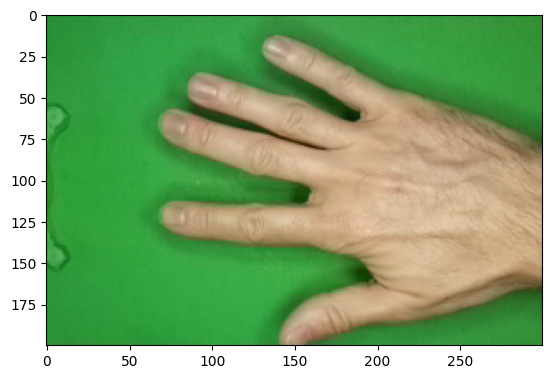

In [17]:
image_paper = image.load_img('/content/ekstraksi/rockpaperscissors/paper/Y0XtXW0pn979O6KK.png')
image_paper_plot = plt.imshow(image_paper)

In [33]:
rock_folder = os.path.join('/content/ekstraksi/rockpaperscissors/rock')

len_rock_folder = len(os.listdir(rock_folder))
print("Total gambar:", len_rock_folder)

rock = os.listdir(rock_folder)
print("5 file dalam folder rock:")

# Looping data di dalam folder rock
i=0
rock_temp = []
for file_rock in rock[:5]:
  rock_temp.append(file_rock)
  i=i+1
data_rock = {'Nama File': rock_temp}
df_rock = pd.DataFrame(data_rock, index=[1,2,3,4,5])
df_rock.head()

Total gambar: 726
5 file dalam folder rock:


,Nama File
1,AzWs0iUTTu8bLtsw.png
2,NjO1nKIuSLnWpnK0.png
3,Jg78GVOKbbyQchWq.png
4,iEYJn6rg6FCcLqQv.png
5,cfyxwMjZmO6RYzLq.png


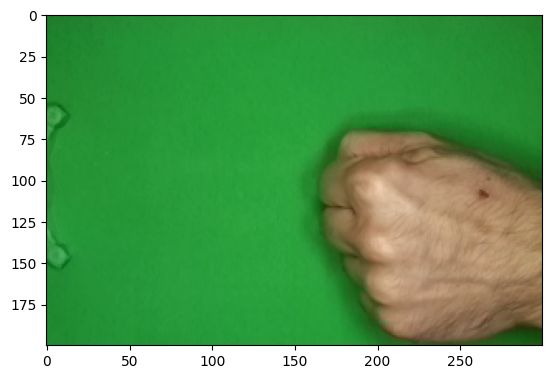

In [20]:
image_rock = image.load_img('/content/ekstraksi/rockpaperscissors/rock/Jg78GVOKbbyQchWq.png')
image_plot = plt.imshow(image_rock)

In [34]:
scissors_folder = os.path.join('/content/ekstraksi/rockpaperscissors/scissors')

len_scissors_folder = len(os.listdir(scissors_folder))
print("Total gambar:", len_scissors_folder)

scissors = os.listdir(scissors_folder)
print("5 file di folder scissors:")

# Looping data di dalam folder scissors
i=0
scissors_temp = []
for file_scissors in scissors[:5]:
  scissors_temp.append(file_scissors)
  i=i+1
data_scissors = {'Nama File': scissors_temp}
df_scissors = pd.DataFrame(data_scissors, index=[1,2,3,4,5])
df_scissors.head()

Total gambar: 750
5 file di folder scissors:


,Nama File
1,mxNMUcdf5UjHfyZQ.png
2,plCaKcxMczZTYQYV.png
3,3bkC6JAPog7xX9WO.png
4,KP9dgcRNzQE9tV0Z.png
5,n3OFHC3Uz9y9JsaM.png


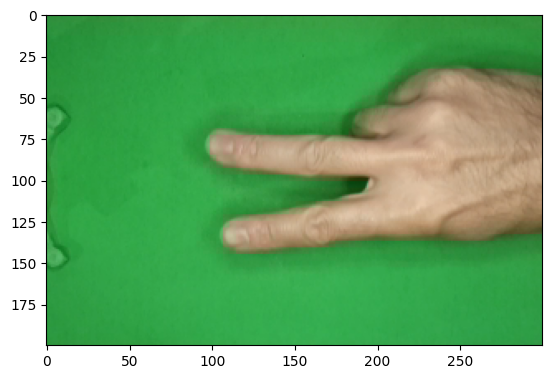

In [23]:
image_scissors = image.load_img('/content/ekstraksi/rockpaperscissors/scissors/mxNMUcdf5UjHfyZQ.png')
image_plot = plt.imshow(image_scissors)

In [24]:
train_dir = os.path.join("/content/ekstraksi/rockpaperscissors/rps-cv-images/")

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True, shear_range=0.2, zoom_range=0.2, fill_mode = 'nearest', validation_split=0.4)

In [26]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [28]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Latih Model untuk mencapai akurasi 96%

In [36]:
class stop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nAccuracy has reached 0.96")
      self.model.stop_training=True
callbacks=stop()

# latih model
train_models = model.fit(
      train_generator,
      batch_size=15,
      epochs=12,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=[callbacks])

Epoch 1/15
33/33 [==============================] - 85s 3s/step - loss: 0.2172 - accuracy: 0.9247 - val_loss: 0.3462 - val_accuracy: 0.8900
Epoch 2/15
33/33 [==============================] - 91s 3s/step - loss: 0.1969 - accuracy: 0.9231 - val_loss: 0.3077 - val_accuracy: 0.9500
Epoch 3/15
33/33 [==============================] - 90s 3s/step - loss: 0.1743 - accuracy: 0.9315 - val_loss: 0.3835 - val_accuracy: 0.8650
Epoch 4/15
33/33 [==============================] - 85s 3s/step - loss: 0.1473 - accuracy: 0.9482 - val_loss: 0.1862 - val_accuracy: 0.9550
Epoch 5/15
33/33 [==============================] - 87s 3s/step - loss: 0.1950 - accuracy: 0.9330 - val_loss: 0.2994 - val_accuracy: 0.9050
Epoch 6/15
33/33 [==============================] - 92s 3s/step - loss: 0.1595 - accuracy: 0.9422 - val_loss: 0.4325 - val_accuracy: 0.8150
Epoch 7/15
33/33 [==============================] - 90s 3s/step - loss: 0.1399 - accuracy: 0.9513 - val_loss: 0.2225 - val_accuracy: 0.9300
Epoch 8/15
33/33 [==

Saving WhatsApp Image 2024-03-18 at 5.28.11 PM.jpeg to WhatsApp Image 2024-03-18 at 5.28.11 PM.jpeg
1/1 [==============================] - 0s 38ms/step
WhatsApp Image 2024-03-18 at 5.28.11 PM.jpeg
Gunting


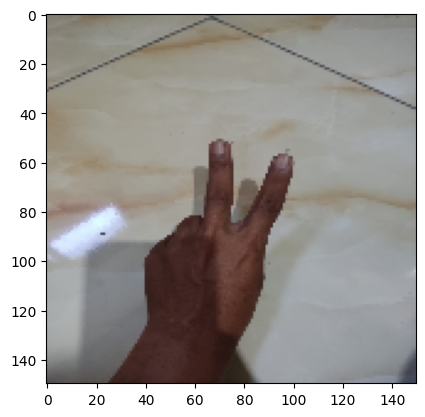

In [39]:
uploaded = files.upload()

for fn in uploaded.keys():

  # prediksi gambar
  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Gunting')
  elif classes[0,1]!=0:
    print('Batu')
  else:
    print('Kertas')